# Chicago Taxi Cab Project

Table of contents:
- A. Data Cleaning
- B. Outliers
- C. Descriptive Question 1
- D. Descriptive Question 2
- E. Regression Question
- F. Cluster Question

For ACT 420: Accounting Analytics Final Project

By Hasong Cho

The dataset I chose to analyze is about Taxi Trips in Chicago, Illinois that I found from Chicago Data Portal, provided by City of Chicago. The dataset contains information on over 200 million taxi trips, spanning from 01/01/2013 to 23/04/2023. The dataset includes 23 variables relevant to taxi trips taken in Chicago including trip distances, trip location, trip date and time, payment methods, and trip time. In order to take more relevant data to time, I will only be using data from 01/01/2016 to 12/31/2022. 

*Chicago Data Portal: https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew


# Import Necessary Packages

In [3]:
# database tools
import pandas as pd 
import numpy as np

# import graphing tools
import seaborn as sns
import matplotlib.pyplot as plt

# import regression library 
import statsmodels.formula.api as smf

# import forecasting library
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#import missing values
from numpy import NaN, nan, NAN

#import date 
from datetime import datetime

#import winsorize 
from scipy.stats.mstats import winsorize

# format floats to have thousands separators and two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#upload data
Community_Area= pd.read_csv('CommAreas.csv')

# A) Data Cleaning

In this section, I will be cleaning the datasets I will need before transforming them for actual analysis. The following datasets will be cleaned: 
- Chicago Taxi Cab Dataset from 2016
- Chicago Taxi Cab Dataset from 2017
- Chicago Taxi Cab Dataset from 2018
- Chicago Taxi Cab Dataset from 2019
- Chicago Taxi Cab Dataset from 2020
- Chicago Taxi Cab Dataset from 2021
- Chicago Taxi Cab Dataset from 2022
- Chicago Taxi Community Area Dataset

The data cleaning process will be as follows:
1. Data Consistency: I will filter the dataset to be more reflective of a realistic taxi trip
2. Data Relevance: I will only keep columns that are relevant to the scope of my analysis 
3. Missing Values: I will handle missing values depending on which variables are missing
4. Data Types: I will update data types for the time series variables
5. Concating dataset: I will need to combine 2016 - 2022 dataset for efficient analysis process
6. Duplicates: I will need to check for duplicates of Trip ID

### 1) Data Consistency

The following will be removed as having extreme maximum values. 
- Trip times less than zero or greater than 86,400 seconds (24 hours) are removed.
- Trip lengths less than zero or greater than 3,500 miles are removed.
- If any component of the trip cost is less than 0 or greater than 10,000, all components of the trip cost are removed.

The following will be restraints to have better quality data, reflective of a realistic normal taxi trip
- Trip times greater than five minutes
- Trip miles great than one
- Trip fare greater than 5 and less than 500
- Trip Total is equal to the sum of Extras, Tolls, Tips and Fare. 

In [6]:
# make a function that will be easier to update each csv file 
def filter_taxi_data(df):
    df = pd.read_csv(df)
    updated_taxi = df[
        (df['Trip Miles'] > 1.00) & 
        (df['Trip Miles'] <= 3500) & 
        (df['Trip Total'] >= 3.25) & 
        (df['Trip Total'] <= 10000) & 
        (df['Trip Seconds'] > 300) & 
        (df['Trip Seconds'] <= 86400) & 
        (df['Fare'] > 5) &
        (df['Fare'] < 500) &
        (df['Trip Total'] == df['Extras'] + df['Tolls'] + df['Tips'] + df['Fare'])
    ]     
    return updated_taxi

In [7]:
# use function to upload a large dataset based on the filtered conditions 2016
taxi_2016 = filter_taxi_data('Taxi_Trips_-_2016.csv')

/var/folders/pp/n1knqjg57ds10zbbb7v7yvfw0000gn/T/ipykernel_50576/3737755971.py:3: DtypeWarning: Columns (16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df)


In [8]:
# use function to upload a large dataset based on the filtered conditions for 2017
taxi_2017 = filter_taxi_data('Taxi_Trips_-_2017.csv')

In [10]:
# use function to upload a large dataset based on the filtered conditions for 2018
taxi_2018 = filter_taxi_data('Taxi_Trips_-_2018.csv')

In [11]:
# use function to upload a large dataset based on the filtered conditions for 2019
taxi_2019 = filter_taxi_data('Taxi_Trips_-_2019.csv')

In [12]:
# use function to upload a large dataset based on the filtered conditions for 2020
taxi_2020 = filter_taxi_data('Taxi_Trips_-_2020.csv')

In [13]:
# use function to upload a large dataset based on the filtered conditions for 2021
taxi_2021 = filter_taxi_data('Taxi_Trips_-_2021.csv')

In [14]:
# use function to upload a large dataset based on the filtered conditions for 2022
taxi_2022 = filter_taxi_data('Taxi_Trips_-_2022.csv')

### 2) Data Relevance

Before uploading the taxi dataset, I would like to go ahead and make changes to the columns of the community area dataset. The community area dataset is downloaded from the City of Chicago data portal which includes information of the community area number and the name of the community area.

In [15]:
# Only store columns that are of interest
Community_Area= Community_Area[['AREA_NUMBE','COMMUNITY']]

In [16]:
# See dataframe 
Community_Area

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD
...,...,...
72,74,MOUNT GREENWOOD
73,75,MORGAN PARK
74,76,OHARE
75,77,EDGEWATER


Now, I will drop the unnecessary columns from the Taxi Dataset which will go through the column function. The columns will be removed since they will be out of scope and keeping them would only lead to large sized datasets

In [17]:
# function to drop unnecessary columns within the scope of my analysis 
def column(df):
    df = df.drop(['Pickup Census Tract','Dropoff Census Tract','Pickup Centroid Latitude','Pickup Centroid Longitude',
                 'Pickup Centroid Location','Dropoff Centroid Latitude',
                 'Dropoff Centroid Longitude','Dropoff Centroid  Location','Company'],
                 axis=1)
    return df

In [18]:
# update data using the function 
new_taxi_2016 = column(taxi_2016)

In [19]:
# update data using the function 
new_taxi_2017 = column(taxi_2017)

In [20]:
# update data using the function 
new_taxi_2018 = column(taxi_2018)

In [21]:
# update data using the function 
new_taxi_2019 = column(taxi_2019)

In [22]:
# update data using the function 
new_taxi_2020 = column(taxi_2020)

In [23]:
# update data using the function 
new_taxi_2021 = column(taxi_2021)

In [24]:
# update data using the function 
new_taxi_2022 = column(taxi_2022)

### 3) Missing Values
Handling missing value is important in the process of data analysis. While methods like replacement may be useful, the variables that are missing in this dataset does not need to be replaced (Taxi ID) or can not be replaced (location variable: Pickup Community Area and Dropoff Community Area. While the longitude and latitude columns can help to fill out the missing values, the missing values for Pickup and Dropoff community area is less than 5%, so I will continue on by deleting the rows. 

In [25]:
# check missing values
new_taxi_2016.isnull().sum()

Trip ID                         0
Taxi ID                       121
Trip Start Timestamp            0
Trip End Timestamp              0
Trip Seconds                    0
Trip Miles                      0
Pickup Community Area      790634
Dropoff Community Area    1030608
Fare                            0
Tips                            0
Tolls                           0
Extras                          0
Trip Total                      0
Payment Type                    0
dtype: int64

In [26]:
# use dropna to delete missing values
new_taxi_2016 = new_taxi_2016.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2017 = new_taxi_2017.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2018 = new_taxi_2018.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2019 = new_taxi_2019.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2020 = new_taxi_2020.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2021 = new_taxi_2021.dropna(subset=['Pickup Community Area','Dropoff Community Area'])
new_taxi_2022 = new_taxi_2022.dropna(subset=['Pickup Community Area','Dropoff Community Area'])

### 4) Check Data Types

Trip Start Timestamp and Trip End Timestamp are currently objects, which needs to be transformed to datetime. By changing to datetime, the analysis for extracting variables like year, month, day, time will be easier.

In [35]:
#check data type
new_taxi_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7898628 entries, 3888218 to 29784978
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Trip ID                 object 
 1   Taxi ID                 object 
 2   Trip Start Timestamp    object 
 3   Trip End Timestamp      object 
 4   Trip Seconds            float64
 5   Trip Miles              float64
 6   Pickup Community Area   float64
 7   Dropoff Community Area  float64
 8   Fare                    float64
 9   Tips                    float64
 10  Tolls                   float64
 11  Extras                  float64
 12  Trip Total              float64
 13  Payment Type            object 
dtypes: float64(9), object(5)
memory usage: 903.9+ MB


In [27]:
#make function to update data type
def update(df):
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp']) #save updated datatype to current column
    df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp']) #save updated datatype to current column
    return df

In [28]:
# update data type using the function 
new_taxi_2016 = update(new_taxi_2016)
new_taxi_2017 = update(new_taxi_2017)
new_taxi_2018 = update(new_taxi_2018)
new_taxi_2019 = update(new_taxi_2019)
new_taxi_2020 = update(new_taxi_2020)
new_taxi_2021 = update(new_taxi_2021)
new_taxi_2022 = update(new_taxi_2022)


### 5) Combining all datasets from year 2016 to 2022

While I cleaned the datasets separately due to the large data size, since I cleaned all the data and the size is smaller, I will combine 2016 - 2022 dataset into one for easier data analysis

In [29]:
# use concat to combine all dataset into one variable => combined data
combined_data = pd.concat([new_taxi_2016,new_taxi_2017,new_taxi_2018,new_taxi_2019,new_taxi_2020,new_taxi_2021,new_taxi_2022])


### 6) Duplicates
The only duplicate value that mater is the Trip ID, which is concerning because every Trip ID is unique. I will need to drop any duplicates, but there were no duplicative rows that were found.

In [30]:
# check duplicates of Trip ID 
duplicates = combined_data.duplicated(subset=['Trip ID'], keep=False)
duplicate_rows = combined_data[duplicates]
duplicate_rows
# There are no duplicate rows 

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type


# B) Outliers

There is no need to worry about outliers in community area because the numbers are just indicative of the location. If there is a skewedness in community, it is due to the nature of where taxis are most in demand. 

However, we may need to check for outliers in Trip Seconds, Trip miles, and Trip Total because the outliers would now just be odd numbers for them. Before moving forward with any decision on how to deal with the outlier, I would first need to investigate and understand the nature of these outliers.


In [34]:
# check for descriptive statistics
combined_data[['Trip Seconds', 'Trip Miles', 'Trip Total']].describe()

,Trip Seconds,Trip Miles,Trip Total
count,"29,835,277.00","29,835,277.00","29,835,277.00"
mean,"1,106.50",5.70,19.33
std,"1,463.02",17.11,20.69
min,301.00,1.01,5.05
25%,540.00,1.60,9.00
50%,780.00,2.60,12.25
75%,"1,317.00",6.70,22.50
max,"86,399.00","3,430.53","9,871.43"


<Axes: xlabel='Trip Seconds', ylabel='Count'>

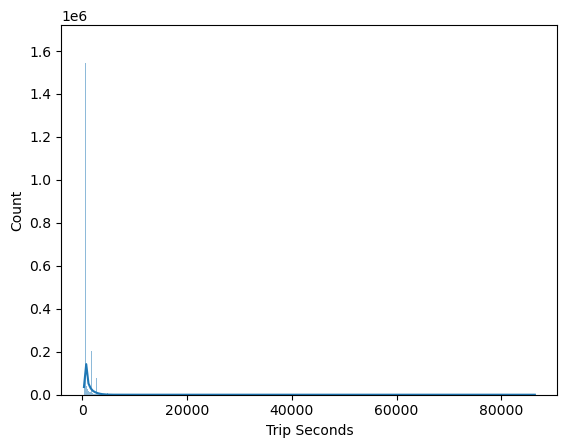

In [33]:
# Check distribution of Trip Seconds
sns.histplot(x='Trip Seconds', data=combined_data, kde=True)

The describe() table shows that 50% percentile of the trips are within 780 seconds and 75% percentile is within 1,317 seconds. The visualization above shows that the distribution of Trip Seconds is right skewed, suggesting that values that are too large (assuming over 13 min) have possibility to be considered outliers. 


<Axes: xlabel='Trip Miles', ylabel='Count'>

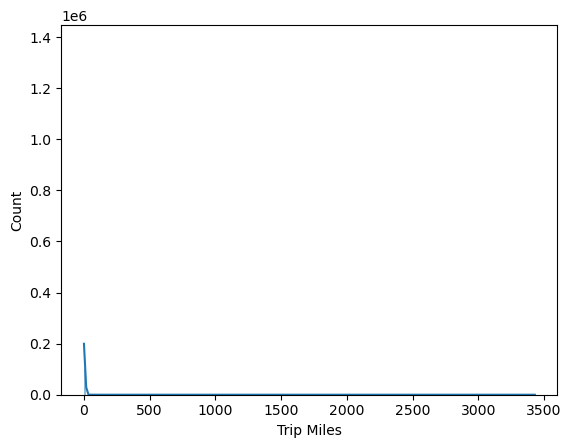

In [39]:
# Check distribution of Trip Miles
sns.histplot(x='Trip Miles', data=combined_data, kde=True)

For Trip miles, the 50% is 2.6 and 75% is 6.7. The visualization above shows that the distribution of Trip Seconds is right-skewed because normally taxi trips are relatively short in duration, with a majority of trips falling within a shorter time frame. However, there is a long tail to the right, indicating a smaller number of instances where trips have significantly longer durations, which contribute to the rightward skewness of the distribution. This skewness is likely a result of factors such as unusually long-distance journeys. 

<Axes: xlabel='Trip Total', ylabel='Count'>

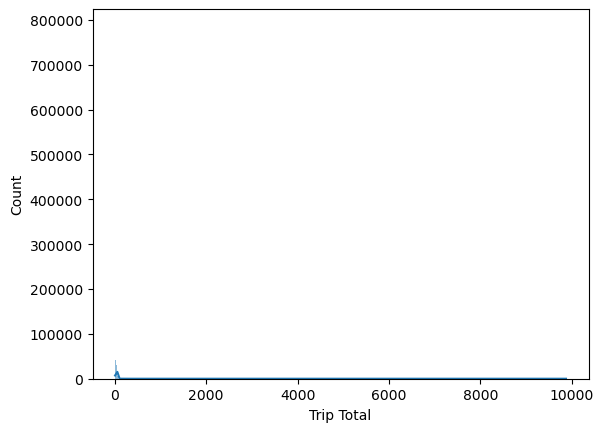

In [40]:
# Check distribution of Trip Total (price)
sns.histplot(x='Trip Total', data=combined_data, kde=True)

Responding to the outliers, I will winsorize because we can keep the observation in our dataset while replacing them with the next closest, less extreme value. I will use 0.01, meaning that I will winsorize 99th percentile. 

In [41]:
combined_data['Trip Seconds'] = winsorize(combined_data['Trip Seconds'], limits = (0,0.01))

In [42]:
combined_data['Trip Miles'] = winsorize(combined_data['Trip Miles'], limits = (0,0.01))

In [43]:
combined_data['Trip Total'] = winsorize(combined_data['Trip Total'], limits = (0,0.01))

# C) Descriptive Question 1:

The first descriptive question I attempt to answer is: 

- What pattern in taxi demand become evident when analyzing the pickup community areas between 2016 and 2022? Are there particular community areas experiencing notable increase in taxi demand?
- In this question, I attempt to see the change in taxi demand.
- When there is an increase, one can consider the possibility of change in landscape due to urban development. In that case, City of Chicago needs to be responsible for regulating the increase of taxi cabs usage in certain areas for efficient planning. 
- To add on, the question defines period of time from 2016 to 2022, meaning shift in patern is measured on a annual basis.

The most important part of this question is defining taxi demand. There are two parts to the question.
- Part 1: Check which Pickup Community Area has the highest counts every year
- In Part 1, I will define taxi demand as number of trips, measured by Trip ID count. The more number of trips, the higher the demand. 
- Part 2:  Check which Pickup Community Area has the highest Percentage Increase in Counts
- In Part 2, I will define taxi demand as percent change in number of trips. The higher the increase in percent change, the higher the demand.

In [44]:
# descriptive_data_1 will be used as a variable for answering this question #1
descriptive_data_1 = combined_data

#### Part 1 - Check which Pickup Community Area has the highest counts every year

First, I would answer this question by defining taxi demand as the number of trips, measured by Trip ID count. Since the question specifically address which community areas witness shifts in taxi demeand, I will count the Trip ID specific to each of the community Area. 

In this part, I will make a dataframe that count Trip ID grouping into Pickup Community Area per year. Then, I will investigate the top 5 areas witnessing the highest number of Trip ID counts per year. After that, I will select locations that appeared in every year as one of the top 5 areas with highest trip IDs. Finally, I will visualize the shift in Trip ID counts to investigate the patterns in taxi demand.


In [47]:
# Add 'year' column based on 'Trip Start Timestamp'
descriptive_data_1['Year'] = descriptive_data_1['Trip Start Timestamp'].dt.year

In [48]:
# count Trip ID by grouping into Pickup Community Area per year. 
counts=descriptive_data_1.groupby(['Pickup Community Area','Year'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')


In [49]:
# For each year,(2016 to 2022), save top 5 areas that have the highest number of counts  
top_5_df=counts.sort_values('Count', ascending=False).groupby('Year').head(5).reset_index(drop=True).sort_values('Year')


In [50]:
# Count the number of areas that appeared from 2016 to 2022. See if the areas appear consistently from 2016 to 2022. 
top_5_counts=top_5_df.value_counts('Pickup Community Area').reset_index()
top_5_counts

,Pickup Community Area,0
0,8.00,7
1,28.00,7
2,32.00,7
3,76.00,7
4,6.00,6
5,33.00,1


The result from the top_5_counts shows that pickup community area 8, 28, 32, 76 appeared as top 5 since 2016 to 2022. To make sense of the data, I will see where the community areas are.

In [53]:
# Merge with Community_Area dataframe which stores community name and number
top_5_df=pd.merge(top_5_df, Community_Area, left_on='Pickup Community Area', right_on='AREA_NUMBE', how='left')
top_5_df['COMMUNITY'].unique()

array(['NEAR NORTH SIDE', 'LOOP', 'LAKE VIEW', 'OHARE', 'NEAR WEST SIDE',
       'NEAR SOUTH SIDE'], dtype=object)


From the map of City of Chicago we see that it is natural that there are more Trip ID counts in the areas with dense population and more companies. 
- We see that community 8 (Near North Side)and 32 (Loop) are in the most central part of Chicago. 
- Community 76 is Ohare, which is the Ohare international airport in Chicago. 
- Community 28 is Near West Side, to the left of community area 32. 
- Community 33 (Near South Side) is also right below community 32. 
- Community 6 is on the upper end of community 8. 

All of the communities except the Ohare airport is in central Chicago.

* Map of Chicago City can be found here: https://www.chicago.gov/city/en/depts/dgs/supp_info/citywide_maps.html#:~:text=Chicago%20is%20divided%20into%20seventy,over%20long%20periods%20of%20time.

To visualize the pattern of taxi demand from 2016 to 2022, I will only use community areas that appeared every year as one of the top 5 highest taxi demand city. The community areas are: 8, 28, 32, and 76

In [54]:
top_4_pickup_areas = top_5_counts['Pickup Community Area'].iloc[:4]
filtered_top_4_df = top_5_df[top_5_df['Pickup Community Area'].isin(top_4_pickup_areas)]

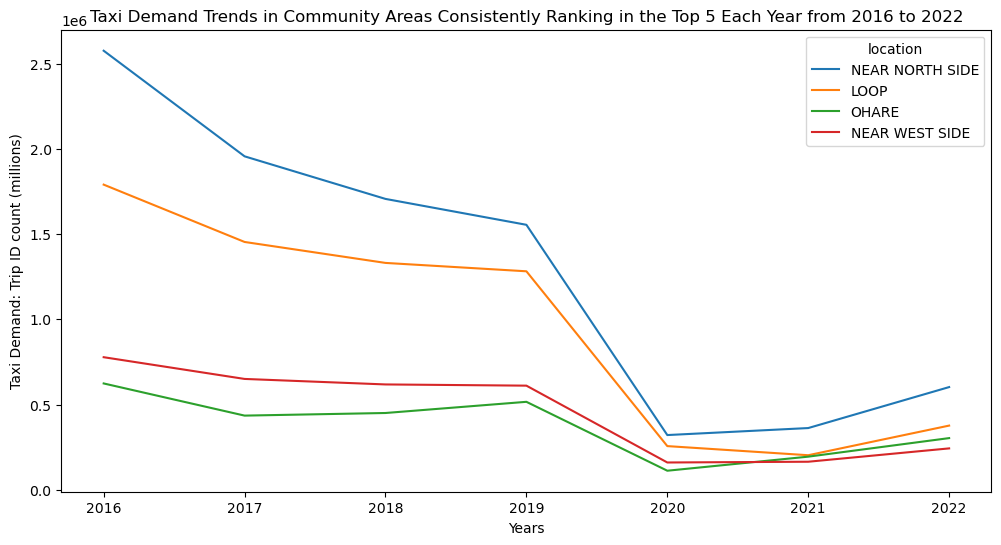

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='COMMUNITY', data=filtered_top_4_df)
plt.title('Trends in Areas Consistently Ranking in the Highest Taxi Demand (count) Community Each Year from 2016 to 2022')
plt.xlabel('Years')
plt.ylabel('Taxi Demand: Trip ID count (millions)')
plt.legend(title='location')
plt.show()

The visualization we see above shows that from year 2016 to 2020, the trend for Near North Side, Loop and Near West side is continuously decreasing. For Ohare on the other hand, see an increasing number of Trips from 2017 to 2019. However, from 2019 to 2020, we see a sharp decrease which is presumably due to the pandemic. 

From year 2016 to 2020, the highest number of counts is in the order of Near North Side( 8), Loop (28), Near West Side (32) and OHARE (76). From mid 2020 to 2022, OHARE had more counts than Near West Side (32). This shift in taxi demand for Ohare(76) and Near West Side (32) may be due to more people landing to the City of Chicago through the Ohare airport or through the possibility of more companies transitioning into remote in the near west side area. The increase in passengers at the Ohare airport is contextually proven by Statista: During the beginning of pandemic, the number of passengers dropped to around 30.9 million. In 2021, however, the passenger volume rose to approximately 54.02 million.

From 2021 to 2022, all the community areas are increasing in taxi demand, showing a recovery

*citation: https://www.statista.com/statistics/226454/passenger-traffic-at-chicago-airport/#:~:text=After%20a%20decade%20of%20growth,up%20to%20some%2054.02%20million.



#### Part 2: Check which Pickup Community Area has the highest Percentage Increase in Counts
By utilizing the part 1's method, we can draw some general conclusions on the taxi demand from year 2016 to 2022 for the top community areas. However, the question specifically asks for community areas with "significant shifts" in taxi demand. The significance can also refer to comparative measurement of taxi trends in community areas where there are increasing demand in taxi, not just high demands in taxi. Part 1 only show community areas with highest numbers, so areas with low counts are automatically removed from the interest. But what if there is a community area that is further away from central Chicago facing an urbanization or gentrification? To answer the question on community areas facing "increasing" demand in taxi, as measured by percent increas in Trip ID counts, I will now choose top community areas that have highest percentage increase in Counts.

In [58]:
# count Trip ID by grouping into Pickup Community Area per year. 
counts=descriptive_data_1.groupby(['Pickup Community Area','Year'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')


In [59]:
grouped_data = counts.sort_values(by=["Pickup Community Area","Year"])

In [60]:
grouped_data

,Pickup Community Area,Year,Count
81,1.00,2016,26622
108,1.00,2017,18784
126,1.00,2018,14678
87,1.00,2019,25365
124,1.00,2020,14747
...,...,...,...
70,77.00,2018,39327
64,77.00,2019,47063
84,77.00,2020,25846
74,77.00,2021,33520


In [61]:
# Create a new column to calculate percent change in counts
grouped_data['Count Change in Percentage']=grouped_data.groupby('Pickup Community Area')['Count'].pct_change() * 100


In [62]:
# Create variable that returns top 5 community areas each year with highest percent increase in counts
top_5_percentage=grouped_data.sort_values('Count Change in Percentage',ascending=False).groupby('Year').head(5).reset_index(drop=True).sort_values('Year')


In [63]:
# return how many times a community appears from 2016 to 2022
top_5_percentage_df=top_5_percentage.value_counts('Pickup Community Area')
top_5_percentage_df
# compare the pickup community area with top_5_counts

Pickup Community Area
54.00    3
47.00    2
72.00    2
55.00    2
53.00    2
52.00    2
37.00    2
1.00     1
74.00    1
73.00    1
71.00    1
70.00    1
67.00    1
50.00    1
38.00    1
2.00     1
36.00    1
33.00    1
32.00    1
24.00    1
9.00     1
7.00     1
6.00     1
5.00     1
4.00     1
3.00     1
75.00    1
dtype: int64

While I attempt to look at community areas with highest percent increase in taxi demand, I do want to pay attention to community areas that are meaningful to the Cab market. For example, take a look at the code below:


In [64]:
top_5_percentage[top_5_percentage['Count']==top_5_percentage['Count'].min()]

,Pickup Community Area,Year,Count,Count Change in Percentage
27,74.00,2017,26,36.84


In [65]:
top_5_percentage[top_5_percentage['Year']==2017]

,Pickup Community Area,Year,Count,Count Change in Percentage
29,55.00,2017,99,28.57
28,38.00,2017,3161,31.05
27,74.00,2017,26,36.84
26,71.00,2017,641,39.05
10,70.00,2017,813,139.12


Community area 74 (Mount Greenwod) is a city with the third highest percent increase in taxi counts compared to the year before. However, if you take a look at the Count column, there are only 26 trips (taxi demand) in the area. Though the percent increased by 36.84%, is this a significant interest to the taxi cab companies?

While it is crucial to consider community areas that have relatively low counts, we do not want to take a look at community areas with counts that are below 25th percentile for the data. To eliminate such problem, we can take consideration into the mean of each year and only looking at highest percent increase in community areas that pass that threshold.

In [66]:
# group Trip ID counts per year and see the descriptive statistics
grouped_data_described=grouped_data.groupby('Year')['Count'].describe().reset_index()

In [68]:
# save 25% descriptive statistics into a dataframe
grouped_data_described=grouped_data_described[['Year','25%']].reset_index()

In [69]:
# see dataframe
grouped_data_described

,index,Year,25%
0,0,2016,383.00
1,1,2017,379.00
2,2,2018,435.00
3,3,2019,"1,776.00"
4,4,2020,"2,043.00"
5,5,2021,"2,897.00"
6,6,2022,"3,101.00"


In [70]:
# merge the 25% information with Count Change in Percentage information
merged_data = pd.merge(grouped_data, grouped_data_described, on='Year')


In [71]:
# Filter rows where 'Count' is greater than the 25%
merged_after=merged_data[merged_data['Count'] >= merged_data['25%']]


In [72]:
#sort by highest Change in Percentage for the top 4 community areas in each year
top_5_25p=merged_after.sort_values('Count Change in Percentage',ascending=False).groupby('Year').head(5).reset_index(drop=True).sort_values(['Year','Count Change in Percentage'])
top_5_25p

,Pickup Community Area,Year,Count,Count Change in Percentage,index,25%
30,1.00,2016,26622,NaN,0,383.00
31,2.00,2016,22981,NaN,0,383.00
32,3.00,2016,119338,NaN,0,383.00
33,4.00,2016,32541,NaN,0,383.00
34,5.00,2016,42584,NaN,0,383.00
29,40.00,2017,1003,24.29,1,379.00
28,37.00,2017,515,27.48,1,379.00
27,38.00,2017,3161,31.05,1,379.00
25,71.00,2017,641,39.05,1,379.00
7,70.00,2017,813,139.12,1,379.00


In [73]:
# return how many times a community appears from 2016 to 2022
top_5_25p.value_counts('Pickup Community Area')

Pickup Community Area
37.00    4
38.00    2
73.00    2
71.00    2
69.00    2
68.00    2
75.00    2
24.00    1
51.00    1
3.00     1
4.00     1
70.00    1
5.00     1
6.00     1
67.00    1
53.00    1
49.00    1
32.00    1
46.00    1
40.00    1
2.00     1
7.00     1
36.00    1
34.00    1
33.00    1
1.00     1
dtype: int64

In [74]:
# only choose top 7 communities that appeared more than once
top_7=top_5_25p.value_counts('Pickup Community Area').reset_index().iloc[:7]

In [75]:
# Merge with Community_Area dataframe which stores community name and number
des_1_final=pd.merge(top_7, Community_Area, left_on='Pickup Community Area', right_on='AREA_NUMBE', how='left')

In [76]:
# merge on the grouped data to see the entire history of top 7 counties
des_1=pd.merge(des_1_final,grouped_data,on='Pickup Community Area')

In [77]:
# see dataframe 
des_1

,Pickup Community Area,0,AREA_NUMBE,COMMUNITY,Year,Count,Count Change in Percentage
0,37.00,4,37,FULLER PARK,2016,404,NaN
1,37.00,4,37,FULLER PARK,2017,515,27.48
2,37.00,4,37,FULLER PARK,2018,677,31.46
3,37.00,4,37,FULLER PARK,2019,1243,83.60
4,37.00,4,37,FULLER PARK,2020,2408,93.72
5,37.00,4,37,FULLER PARK,2021,7324,204.15
6,37.00,4,37,FULLER PARK,2022,8469,15.63
7,38.00,2,38,GRAND BOULEVARD,2016,2412,NaN
8,38.00,2,38,GRAND BOULEVARD,2017,3161,31.05
9,38.00,2,38,GRAND BOULEVARD,2018,4659,47.39


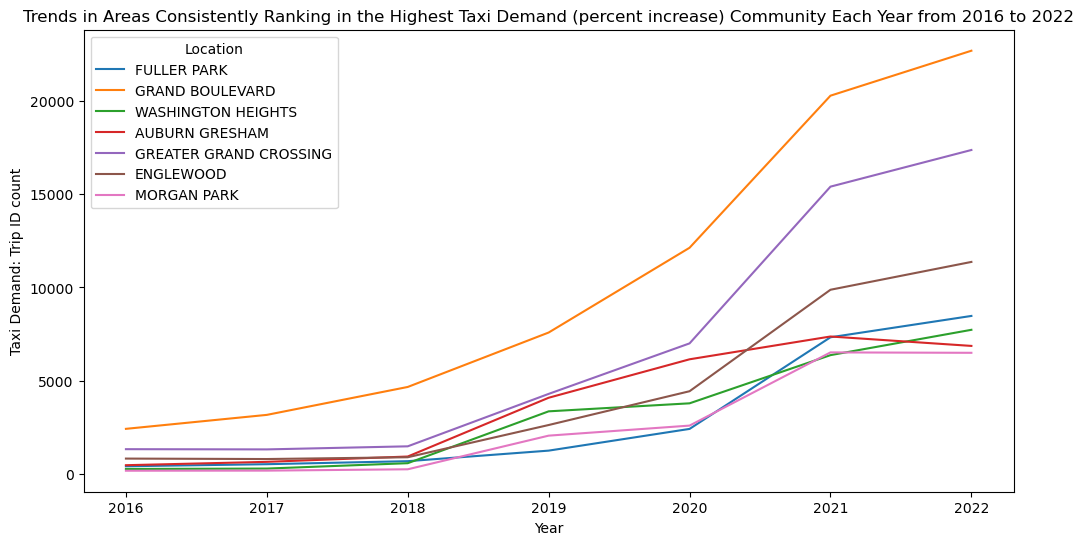

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='COMMUNITY', data=des_1)
plt.title('Trends in Areas Consistently Ranking in the Highest Taxi Demand (percent increase) Community Each Year from 2016 to 2022')
plt.xlabel('Year')
plt.ylabel('Taxi Demand: Trip ID count')
plt.legend(title='Location')
plt.show()

When looking at the map of Chicago, it is surprising to see that Fuller Park, Grand Boulevard,and Greater Grand Crossing are all next to each other. This suggessts a possibility of huge urban development in the area just below central Chicago, showing a potential for more growth in the fuure.

*citation: https://rejournals.com/mixed-use-tod-in-chicagos-grand-boulevard-neighborhood-gets-financing/
The Grand Boulevard started affordable housing projects in the area

The difference between the first graph and the second graph is the selection process of the top community area. In the first visualization, I selected the top counties based on highest number of counts (Trip ID) while for the second visualization I selected based on highest percent increase of Trip IDs.
Comparing the results of the first visualization from part 1 and the visualization from part 2, it is clear that in some counties, trip counts have been increasing. While the relative number of trip counts is very small compared to areas like Near North Side, Loop, Ohare, and Near West side, it is worthwhile for the City of Chicago to take into consideration for these communities. 

# D) Descriptive Question 2:

The second descriptive question I attempt to answer is:

How have various factors (competition, unforseen event, internal strategy development) influence taxi demands? 
- competition: The biggest competitor of taxi is undeniably the ride-sharing apps: Lyft and Uber. Uber and Lyft were developed in 2010 and 2012, respectively. Since the dataset I used is only from 2016 to 2022, I will follow the more recent competitor's move: Uber X. In June 2022,uber launched UberX share, which allows multiple customers to share a ride. According to Uber, this new initiative saves customers up to 20% on the normal fare, a huge benefit for consumers to use UberX. 
- unforseen event: The Covid-19 pandemic starting its major outbreak in the United States from 2020-03 shut down lots of companies and stores, leading to decrease in taxi cabs all over the country.
- internal strategy development: A taxi app, curb, in 2021-08 (in Chicago) was redesigned to revampe the taxi business, facing a proactive tactic against ride-sharing apps.

For this question only, I will subset the timeframe from 2019-10 to 2022-12 because the events are very recent.

*citation: UberX
https://www.uber.com/us/en/ride/uberx-share/#:~:text=Correct%2C%20Uber%20Pool%20is%20now,co%2Drider%20along%20your%20way.

*citation: COVID-19
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8608371/#:~:text=For%20taxi%20drivers%2C%20the%20average,recover%20from%20epidemic%20more%20quickly.

*citation: Curb
https://www.fox32chicago.com/news/cheaper-than-uber-chicago-taxi-business-revamped-with-new-app-curb
https://www.travelandleisure.com/travel-tips/mobile-apps/curb-app-upfront-taxi-fares



In [82]:
# descriptive_data_2 will be used as a variable for answering this question
descriptive_data_2 = combined_data

In [84]:
#Extract Year and Month from Trip Start Timestamp to take consideration of the timeline 
descriptive_data_2['Year_Month'] = descriptive_data_2['Trip Start Timestamp'].dt.strftime('%Y-%m')

In [207]:
descriptive_data_2

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Year,Month,pandemic,UberX,Curb,Year_Month
3888218,0b4c5fb9c0dc2c31b07ce5ef3198deae14d416ef,07800b5117d6e914644f00471b596f2a38426759f6f64c...,2016-02-26 19:30:00,2016-02-26 19:45:00,1440.0,2.50,8.0,6.0,16.50,1.0,0.0,0.0,17.50,Credit Card,2016,2,0,0,0,2016-02
3888225,62df4e1c138e75479c08f6535fd753074d95ca88,f1459903dbea35f25166b3c979ef85051ab2a0c1b287d2...,2016-02-26 21:30:00,2016-02-26 22:15:00,2160.0,20.40,76.0,33.0,49.50,6.0,0.0,4.0,59.50,Credit Card,2016,2,0,0,0,2016-02
3888237,61e7686301464f9965aa82a34e7cbd95f1e97d43,ba48aac1be874e3212623beb83b4538c5567a8676f2cf3...,2016-02-13 16:15:00,2016-02-13 16:30:00,1080.0,6.50,8.0,60.0,18.75,0.0,0.0,1.5,20.25,Cash,2016,2,0,0,0,2016-02
3888240,9614cbe1c1dc9a3d633bc28c3a66c286148a165f,740b5605a300a8df7c54950649d5ed9ff6292e7ab9392c...,2016-02-27 02:45:00,2016-02-27 02:45:00,480.0,1.60,6.0,3.0,7.75,1.0,0.0,1.0,9.75,Credit Card,2016,2,0,0,0,2016-02
3888288,b3cd249bf591f0668a88bdfc2b859071bf330852,4df2912dd50d4f329ca8bbdc29820405a25dab85dd7524...,2016-02-26 20:00:00,2016-02-26 20:15:00,960.0,2.30,8.0,28.0,11.25,0.0,0.0,0.0,11.25,Cash,2016,2,0,0,0,2016-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382416,e030fd7f7823609387b04d407509a786e002888f,b71c6761efe32829e7e453b0c6fcb78a456a7d83c720c7...,2022-12-31 23:45:00,2023-01-01 00:00:00,767.0,2.39,8.0,24.0,10.25,0.0,0.0,0.0,10.25,Cash,2022,12,1,1,0,2022-12
6382418,e32619aecacfd5acbbf6f28d7e7a896ba29fc1c9,ca30b49aab641fe71294a9b03b991b968c7f3e47e11691...,2022-12-31 23:45:00,2023-01-01 00:45:00,3865.0,18.24,16.0,16.0,51.75,0.0,0.0,0.0,51.75,Cash,2022,12,1,1,0,2022-12
6382419,f12c74c35ec2c32083f27157776d6667b17c70be,ce8e5531edf9255d9ecb2f930e320f9c1c83229e437445...,2022-12-31 23:45:00,2023-01-01 00:15:00,974.0,1.69,32.0,8.0,9.50,0.0,0.0,1.5,11.00,Cash,2022,12,1,1,0,2022-12
6382420,f5ba11ba1d2f0dd11c598d05481947e19c8e1a17,0cbf5c0f6aca3628d77c7b6fe89715757ed402a70b0f8b...,2022-12-31 23:45:00,2022-12-31 23:45:00,539.0,1.85,32.0,28.0,11.48,0.0,0.0,0.0,11.48,Mobile,2022,12,1,1,0,2022-12


In [148]:
#make pandemic variable
descriptive_data_2['pandemic'] = np.where((descriptive_data_2['Year_Month'] >= '2020-03') & (descriptive_data_2['Year_Month'] <= '2021-03'), 1, 0)

In [87]:
#make UberX share variable
descriptive_data_2['UberX'] = np.where((descriptive_data_2['Year_Month']>='2022-05'),1,0)

In [153]:
#Curb variable
descriptive_data_2['Curb'] = np.where((descriptive_data_2['Year_Month']>='2021-08') & (descriptive_data_2['Year_Month']<='2022-02'),1,0)

Part 1 - Pandemic 

In [149]:
# group by Year_Month and pandemic dummy variable with counts based on trips
counts_2=descriptive_data_2.groupby(['Year_Month','pandemic'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')

In [150]:
# organize and sort from lowest Year_Month date to most recent date
counts_2 = counts_2.sort_values('Year_Month')

In [147]:
counts_2

,Year_Month,pandemic,Count
5,2016-01,0,648280
3,2016-02,0,677472
1,2016-03,0,783350
0,2016-04,0,784988
2,2016-05,0,679413
...,...,...,...
53,2022-08,0,231042
52,2022-09,0,233616
54,2022-10,0,227739
59,2022-11,0,207658


In [151]:
subset = counts_2[counts_2['Year_Month']>='2019-10'].sort_values('Year_Month')

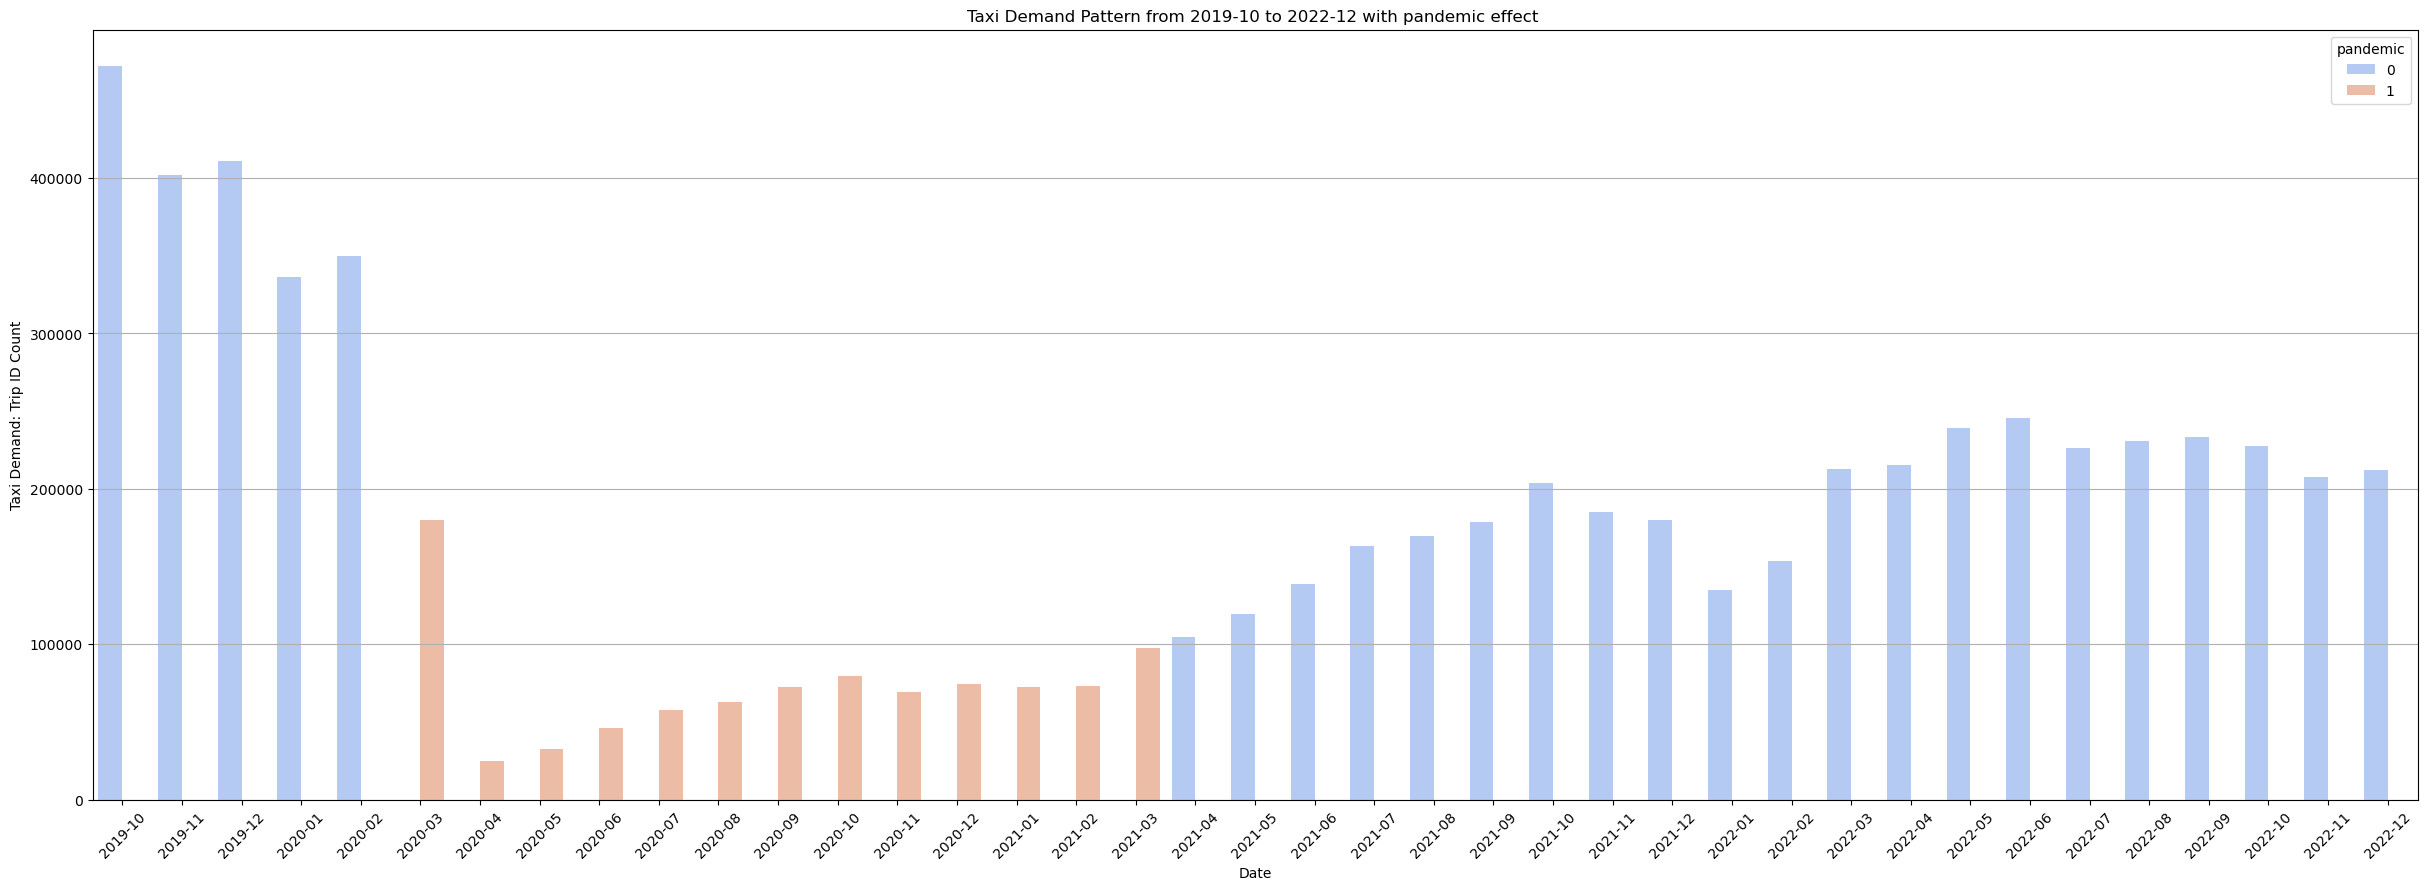

In [152]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Year_Month', y='Count', hue='pandemic', data=subset, palette='coolwarm')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

plt.xlabel('Date')
plt.ylabel('Taxi Demand: Trip ID Count')
plt.title('Taxi Demand Pattern from 2019-10 to 2022-12 with pandemic effect ')
plt.grid(axis='y')

# Show the plot
plt.show()

According to the depicted graph, it's evident that the count significantly dropped post-March 2020, reaching its lowest point in April and May. Nevertheless, there is a slight upward trend in demand from May onwards. This indicates that although the pandemic had a notable impact during the brief periods of March to April and April to May, there has been a gradual recovery. Consequently, while the pandemic initially led to a considerable decrease in taxi demands, it's challenging to assert that there was a continuous decline throughout the entire 12-month pandemic period.

Part 2 - UberX

In [124]:
# group by Year_Month and pandemic dummy variable with counts based on trips
counts_UberX=descriptive_data_2.groupby(['Year_Month','UberX'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')

In [125]:
counts_UberX = counts_UberX.sort_values('Year_Month')

In [127]:
subset_UberX = counts_UberX[counts_UberX['Year_Month']>='2019-10'].sort_values('Year_Month')

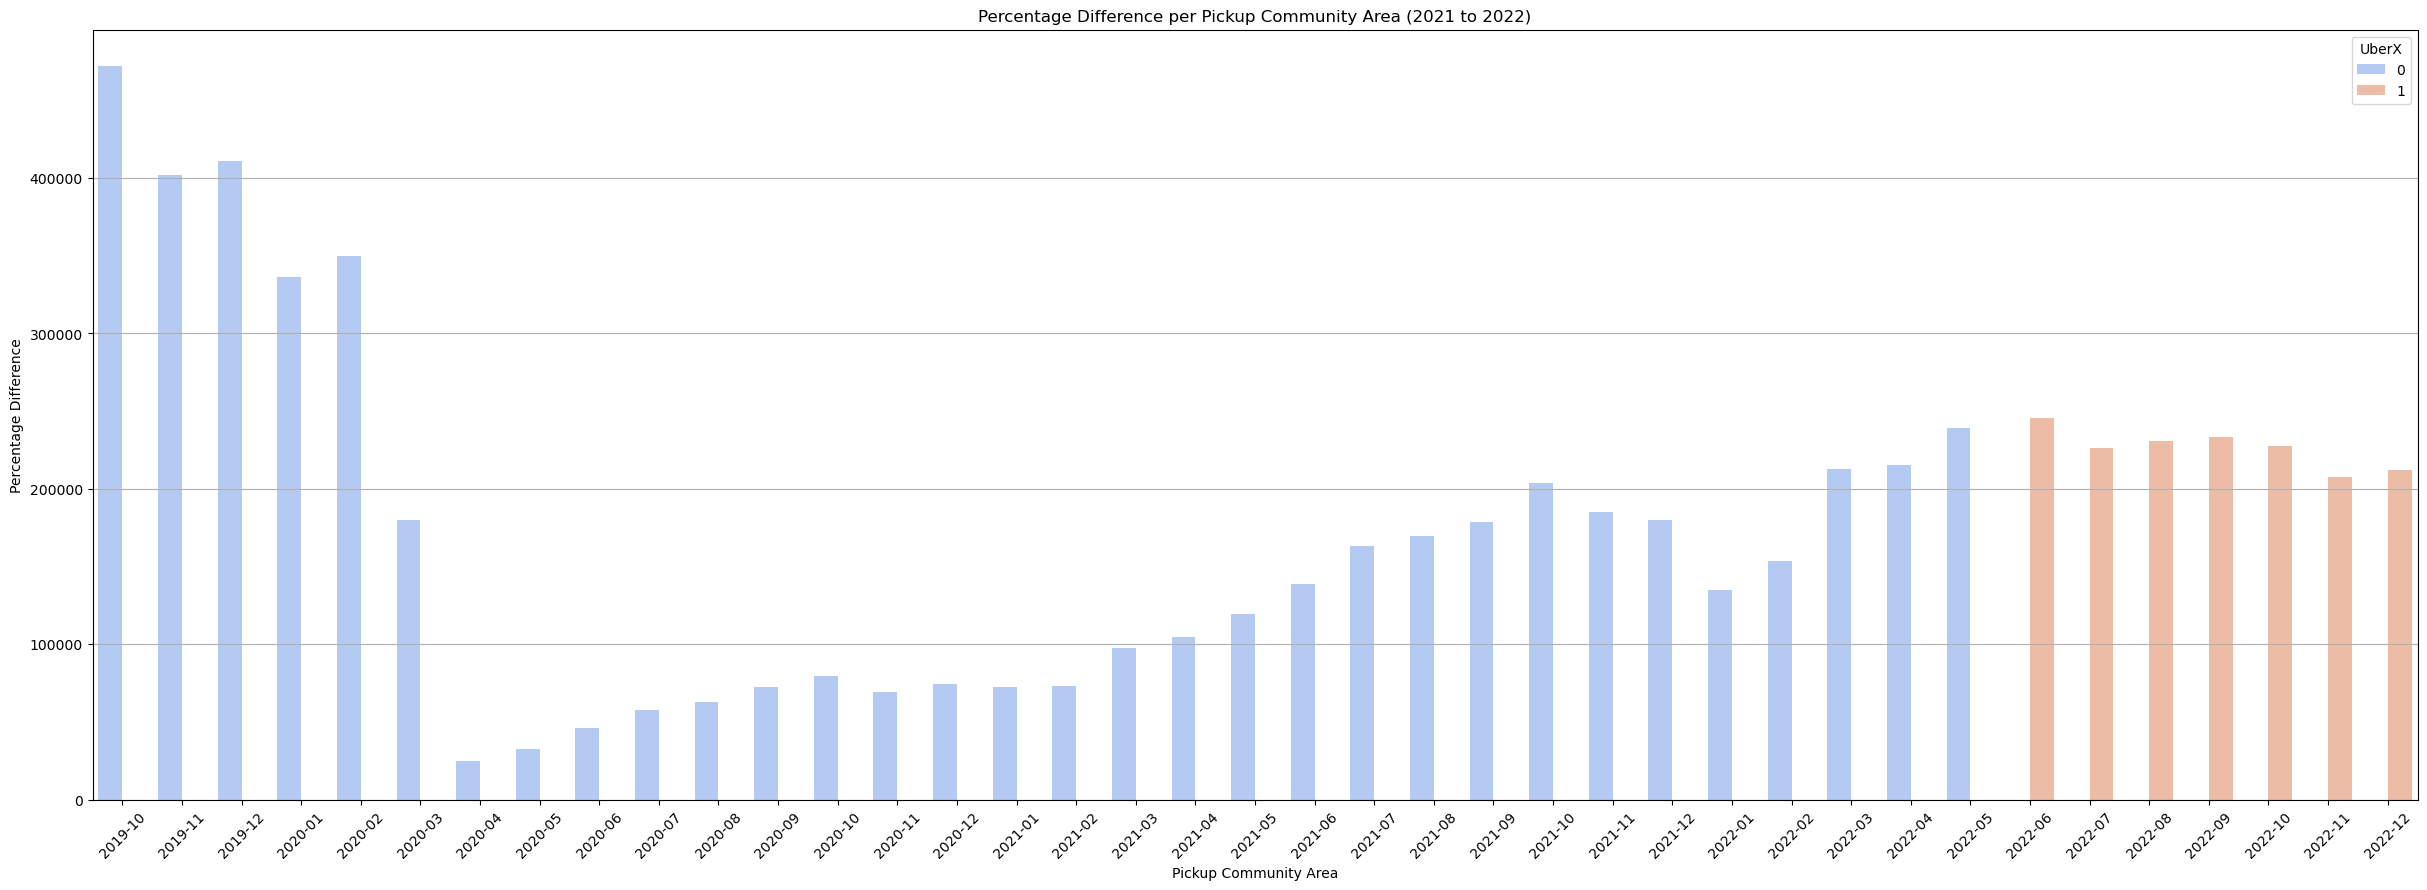

In [128]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Year_Month', y='Count', hue='UberX', data=subset_UberX, palette='coolwarm')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

plt.xlabel('Date')
plt.ylabel('Taxi Demand: Trip ID Count')
plt.title('Taxi Demand Pattern from 2019-10 to 2022-12 with UberX effect')
plt.grid(axis='y')

# Show the plot
plt.show()

The highlighted segment in the graph (depicted in orange) represents the monthly count of taxi trips for each year. Notably, the number of taxi demand starts to decrease every since june of 2022. While this graph doesn't prove any causation effect, it indicates that when UberX was put into act, the taxi demand decreased during the time. 

Part 3 - Curb

In [154]:
# group by Year_Month and pandemic dummy variable with counts based on trips
counts_Curb=descriptive_data_2.groupby(['Year_Month','Curb'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')

In [155]:
counts_Curb = counts_Curb.sort_values('Year_Month')

In [156]:
subset_Curb = counts_Curb[counts_Curb['Year_Month']>='2019-10'].sort_values('Year_Month')

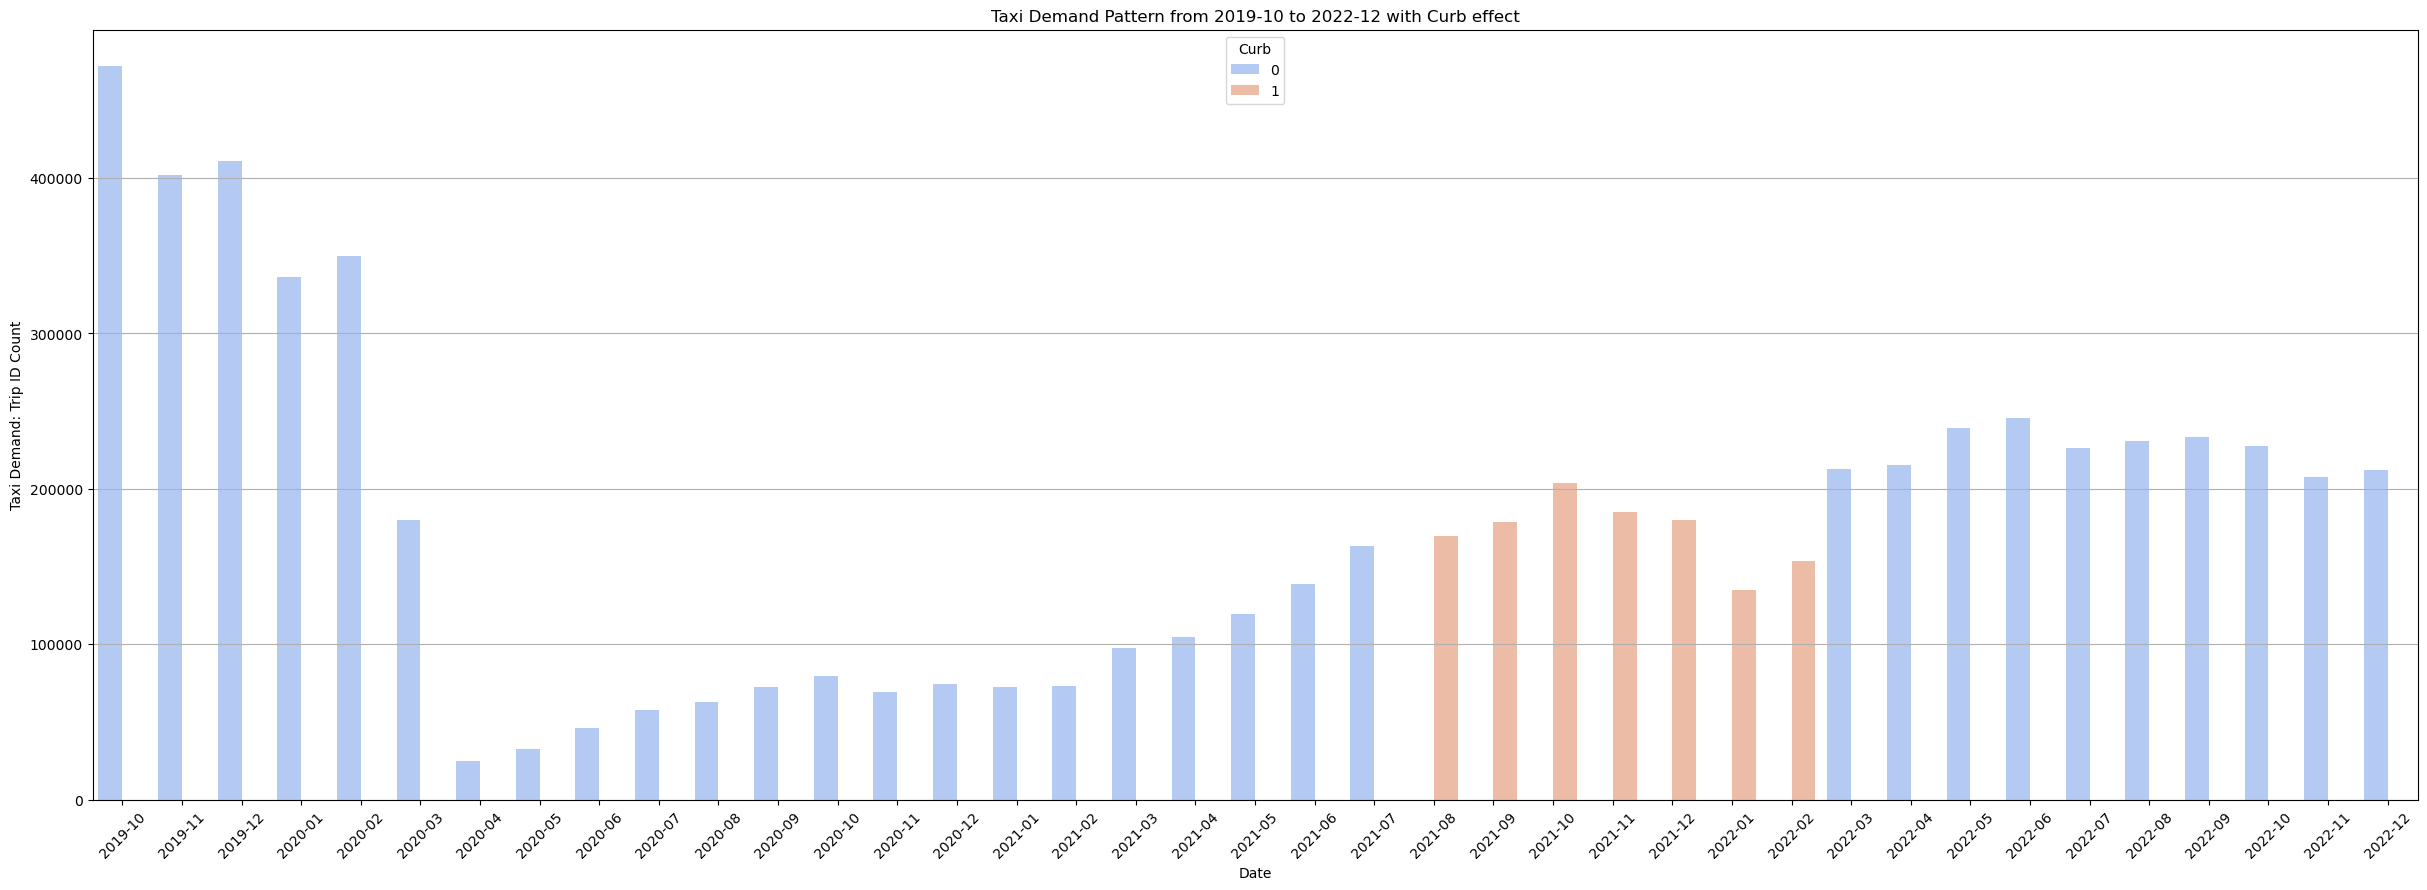

In [157]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Year_Month', y='Count', hue='Curb', data=subset_Curb, palette='coolwarm')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

plt.xlabel('Date')
plt.ylabel('Taxi Demand: Trip ID Count')
plt.title('Taxi Demand Pattern from 2019-10 to 2022-12 with Curb effect')
plt.grid(axis='y')

# Show the plot
plt.show()

By looking at the difference between months before Curb's effect, one can note that there was increase in taxi demand when Curb app was revamped (from 2021 august to 2021 december). However, by looking at this graph, it may also be a gradual recovery from a huge drop that happened since the pandemic. To see whether this is merely due to a seasonality in the dataset, I tried graphing the entire dataset based on dates. 

In [183]:
#create a date column with year, month and day
descriptive_data_2['date']=descriptive_data_2['Trip Start Timestamp'].dt.strftime('%Y-%m-%d')

In [184]:
# group by Year_Month and pandemic dummy variable with counts based on trips
counts_season=descriptive_data_2.groupby(['Year','date'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')

counts_season = counts_season.sort_values('date')

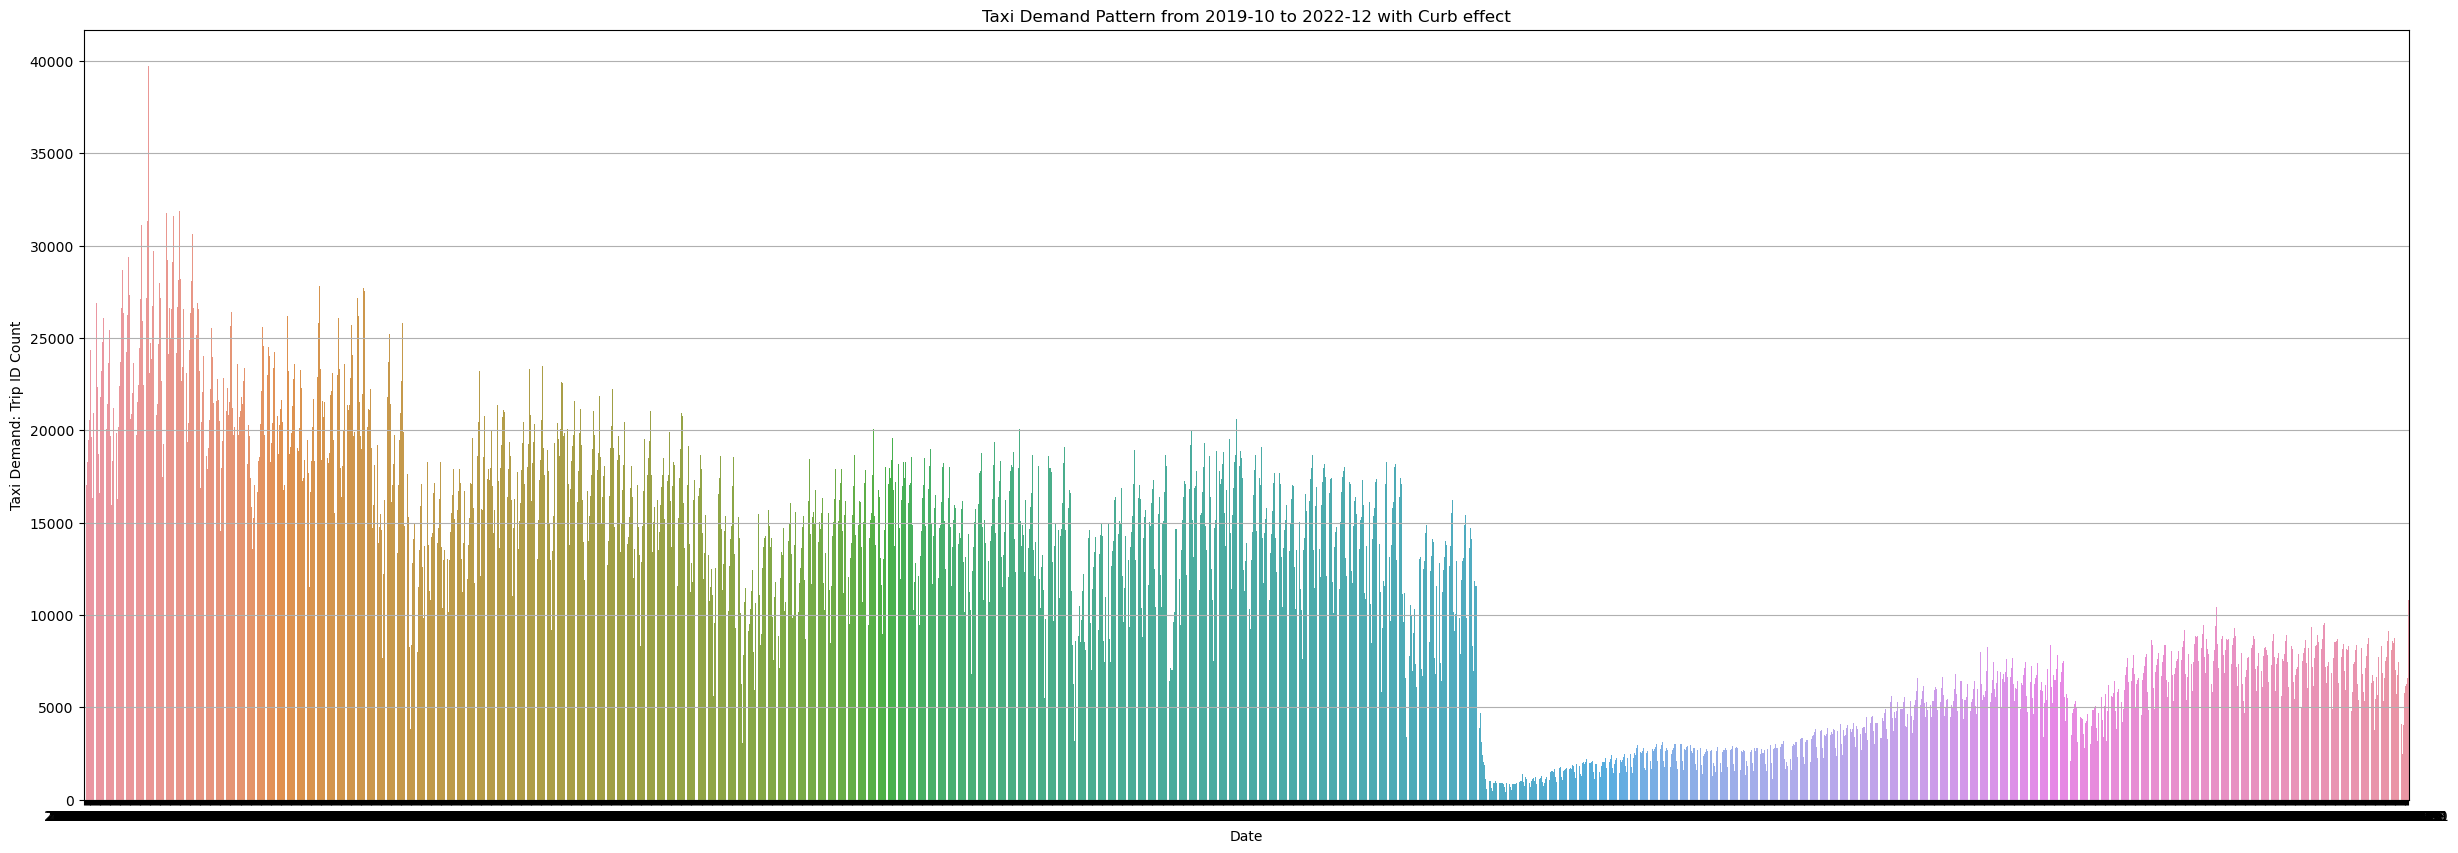

In [189]:
plt.figure(figsize=(30, 10))
sns.barplot(x='date', y='Count', data=counts_season)

# Customize x-axis ticks

plt.xlabel('Date')
plt.ylabel('Taxi Demand: Trip ID Count')
plt.title('Taxi Demand Pattern from 2016 to 2022')
plt.grid(axis='y')

# Show the plot
plt.show()

The plot shows some seasonality in the dataset. Although the date can't be read property due to many rows of dates, it is clear that there are some increases/decreases throughout the period of 12 to 15 weeks. Thus, although the general number of taxi trip has plummeted, the ups and downs of the data is following the seasonality. 

Based on the information provided, it appears that several factors have influenced taxi demands:

- Unforeseen Events (e.g., the pandemic): The data suggests a significant impact on taxi demands during specific periods, particularly in March to April and April to May of 2020, coinciding with the onset of the global pandemic. While there was a temporary decrease, subsequent months show a gradual recovery, indicating adaptability to unforeseen events. 

- Competition: While the graph alone doesn't establish a causation effect, the timing of the decline coinciding with the implementation of UberX implies a correlation between the two events. This correlation may indicate that the introduction of UberX has had an impact on traditional taxi demand. Competing services with alternative features, pricing models, and convenience can influence consumer choices, potentially leading to a reduction in demand for traditional taxi services. To further support or validate this observation, additional analyses, such as statistical tests or a more detailed examination of competitive dynamics, would be necessary.

- Internal initiatives: The analysis of the data suggests that there was an increase in taxi demand between August and December 2021, corresponding to the period when the Curb app was revamped. However, it's acknowledged that this observed increase may be part of a gradual recovery from a significant drop that occurred during the pandemic.

In conclusion, just by grouping into the existence of pandemic effect /competition / internal initiatives, we can assume some correlations within the trends and the time period. However, it is also crucial to acknowledge that even those vents themselves are interrelated, and that there can be multiple causes. 


## E) Regression Question
OLS: How does the variation in trip duration ('trip seconds') relate to changes in trip miles, the time of day, Month of Year, and the day of the week over the period of 6 years?

Duration estimation is crucial for multiple reasons for the City of Chicago because it is incharge of public safety, public planning, and public policy. By predicting the duration of the trip depending on potential factors based on the crowdedness of the road (time of day/ day of week) and traffic (short trip miles but long duration would mean high traffic), City of Chicago can plan ahead for resource planning, traffic and infrastructure planning, and operational efficiency.



In [194]:
# regression_data will be used as a variable for answering this question #1
regression_data = combined_data


In [195]:
combined_data

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Year,Year_Month,pandemic,UberX,Curb,date
3888218,0b4c5fb9c0dc2c31b07ce5ef3198deae14d416ef,07800b5117d6e914644f00471b596f2a38426759f6f64c...,2016-02-26 19:30:00,2016-02-26 19:45:00,"1,440.00",2.50,8.00,6.00,16.50,1.00,0.00,0.00,17.50,Credit Card,2016,2016-02,0,0,0,2016-02-26
3888225,62df4e1c138e75479c08f6535fd753074d95ca88,f1459903dbea35f25166b3c979ef85051ab2a0c1b287d2...,2016-02-26 21:30:00,2016-02-26 22:15:00,"2,160.00",20.40,76.00,33.00,49.50,6.00,0.00,4.00,59.50,Credit Card,2016,2016-02,0,0,0,2016-02-26
3888237,61e7686301464f9965aa82a34e7cbd95f1e97d43,ba48aac1be874e3212623beb83b4538c5567a8676f2cf3...,2016-02-13 16:15:00,2016-02-13 16:30:00,"1,080.00",6.50,8.00,60.00,18.75,0.00,0.00,1.50,20.25,Cash,2016,2016-02,0,0,0,2016-02-13
3888240,9614cbe1c1dc9a3d633bc28c3a66c286148a165f,740b5605a300a8df7c54950649d5ed9ff6292e7ab9392c...,2016-02-27 02:45:00,2016-02-27 02:45:00,480.00,1.60,6.00,3.00,7.75,1.00,0.00,1.00,9.75,Credit Card,2016,2016-02,0,0,0,2016-02-27
3888288,b3cd249bf591f0668a88bdfc2b859071bf330852,4df2912dd50d4f329ca8bbdc29820405a25dab85dd7524...,2016-02-26 20:00:00,2016-02-26 20:15:00,960.00,2.30,8.00,28.00,11.25,0.00,0.00,0.00,11.25,Cash,2016,2016-02,0,0,0,2016-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382416,e030fd7f7823609387b04d407509a786e002888f,b71c6761efe32829e7e453b0c6fcb78a456a7d83c720c7...,2022-12-31 23:45:00,2023-01-01 00:00:00,767.00,2.39,8.00,24.00,10.25,0.00,0.00,0.00,10.25,Cash,2022,2022-12,0,1,0,2022-12-31
6382418,e32619aecacfd5acbbf6f28d7e7a896ba29fc1c9,ca30b49aab641fe71294a9b03b991b968c7f3e47e11691...,2022-12-31 23:45:00,2023-01-01 00:45:00,"3,865.00",18.24,16.00,16.00,51.75,0.00,0.00,0.00,51.75,Cash,2022,2022-12,0,1,0,2022-12-31
6382419,f12c74c35ec2c32083f27157776d6667b17c70be,ce8e5531edf9255d9ecb2f930e320f9c1c83229e437445...,2022-12-31 23:45:00,2023-01-01 00:15:00,974.00,1.69,32.00,8.00,9.50,0.00,0.00,1.50,11.00,Cash,2022,2022-12,0,1,0,2022-12-31
6382420,f5ba11ba1d2f0dd11c598d05481947e19c8e1a17,0cbf5c0f6aca3628d77c7b6fe89715757ed402a70b0f8b...,2022-12-31 23:45:00,2022-12-31 23:45:00,539.00,1.85,32.00,28.00,11.48,0.00,0.00,0.00,11.48,Mobile,2022,2022-12,0,1,0,2022-12-31


Before building on the model, the relationship between the variables is as follows:
- Dependent Variable: Trip Duration ('Trip Seconds')
- Independent Variables: 
- Trip Miles: To understand how the distance of a trip influences its duration. 
- Time of Day: To examine whether trip duration varies during different times of the day. 
- Day of the Week: To explore whether trip duration is influenced by the day of the week.

In [196]:
# add variables time of day and day of week
regression_data['time_of_day'] = regression_data['Trip Start Timestamp'].dt.hour
regression_data['day_of_week'] = regression_data['Trip Start Timestamp'].dt.dayofweek
regression_data['Month'] = regression_data['Trip Start Timestamp'].dt.month

Before starting off with the modeling, I want to see the distribution of taxi trips per day over the 24 hour time period.  Day of week is indicated as the following:

- 0: Monday
- 1: Tuesday
- 2: Wednesday
- 3: Thursday
- 4: Friday
- 5: Saturday
- 6: Sunday

In [5]:
tod_viz=combined_data.groupby(['time_of_day','day_of_week'])['Trip ID'].count().reset_index(name="Count")

NameError: name 'regression_data' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_of_day', y='Count', hue='day_of_week', data=tod_viz,palette='coolwarm')
plt.title('Taxi Demand Pattern depending on time of day per day of week: 0 (Monday) 6 (Sunday)')
plt.xlabel('Time of Day')
plt.ylabel('Taxi Demand: Trip ID count')
plt.show()

In [197]:
# create variables for regression model 
y = regression_data['Trip Seconds']
trip_miles = regression_data['Trip Miles']
time_of_day = regression_data['time_of_day']
day_of_week = regression_data['day_of_week']


In [199]:
# model where predicting y: trip seconds
model = smf.ols('y ~ trip_miles+time_of_day+day_of_week', data = regression_data).fit()

In [200]:
# see model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 1.258e+07
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:58:19   Log-Likelihood:            -2.2851e+08
No. Observations:            29835277   AIC:                         4.570e+08
Df Residuals:                29835273   BIC:                         4.570e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     433.2711      0.308   1405.876      0.000     432.667     433.875
trip_miles    104.6036      0.017   6129.333      0.000     104.570     104.637
time_of_day     7.6179      0.016    469.184      0.000       7.586       7.650
day_of_week    -8.5445      0.049   -172.784      0.000      -8.641      -8.448
==============================================================================
Omnibus:                 13217617.543   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        121708801.944
Skew:                           1.904   Prob(JB):                         0.00
Kurtosis:                      12.132   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared for this model is 0.559. approximately 55.9% of the variance in 'trip_seconds' is explained by the independent variables included in the model ('trip_miles', 'time_of_day', 'day_of_week'). The remaining 44.1% represents unexplained variance or variability that is not captured by the model.

Coefficients:
- Intercept: In this model, when 'trip_miles', 'time_of_day', and 'day_of_week' are all zero, the predicted 'trip_seconds' is 433.27 seconds.
- Trip Miles: For each one-unit increase in 'trip_miles', the predicted 'trip_seconds' is expected to increase by 104.60 seconds, holding other variables constant. This is very intuitive because normally, the more miles you go the longer it takes.
- Time_of_Day: For each one-unit increase in 'time_of_day', the predicted 'trip_seconds' is expected to increase by 7.6179 seconds, holding other variables constant. This suggests that, on average, trips later in the day ('time_of_day') tend to take longer. This is also intuitive because compared to taxis in the morning, there is more traffic in the evenings.
- Day of Week: For each one-unit increase in 'day_of_week', the predicted 'trip_seconds' is expected to decrease by 8.5445 seconds, holding other variables constant. The negative coefficient suggests that, on average, trips on later days of the week ('day_of_week') tend to take less time compared to earlier days. This is surprising because this means that weekends (which are later in the week) tend to take less trip seconds. 

Usefulness:

- Regression provides insights into the direction and strength of the relationship of what factors could potentially lead to duration of the trip by providing the parameters. This predictive power can be beneficial for planning and resource allocation, helping taxi services and users anticipate trip durations under different conditions. Also, The model allows for the detection of patterns related to time of day and day of the week. For instance, the unexpected negative coefficient for 'day_of_week' suggests a counterintuitive relationship that might prompt further investigation into the reasons behind shorter trip durations on later days. For taxi service providers, the model offers insights into the variables that significantly contribute to trip durations. The p values for all the variables are less than 0.05, which indicate a statistical significance. This information can be leveraged for pricing strategies, optimizing driver schedules, and improving overall service efficiency.

Based on the time_of_day coefficient, I took a closer look at the time_of_day and day_of_week variables. From this result, it is shown that most taxi demands are between 4 o clock to 7 o clock. This is intuitive as shown by the coefficients of time_of_day being positive. 

To investigate whether categorizing the peak time into the regression model would improve the explainability (R squared), I came up with a new variable added to the model. The model2 result shows that R squared did increase after all, with 0.697 meaning 69.7% of this model is explained by the independent variables. 

In [211]:
peak=regression_data.groupby(['time_of_day','day_of_week'])['Trip ID'].count().sort_values(ascending=False).reset_index(name='Count')


In [213]:
peak.head(10)

,time_of_day,day_of_week,Count
0,18,4,372005
1,17,4,356342
2,19,4,346302
3,18,3,341824
4,16,4,335582
5,17,3,329973
6,18,2,323243
7,15,4,317528
8,19,3,317460
9,17,2,314745


In [215]:
# set peak time
regression_data['peak'] = np.where((regression_data['time_of_day'] >= 15) & (regression_data['time_of_day'] <= 19) & (regression_data['day_of_week'] == 4), 1, 0)


In [219]:
trip_total = regression_data['Trip Total']

In [220]:
model2 = smf.ols('y ~ trip_miles+peak+trip_total', data = regression_data).fit()

In [221]:
# see model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 2.283e+07
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:20:05   Log-Likelihood:            -2.2292e+08
No. Observations:            29835277   AIC:                         4.458e+08
Df Residuals:                29835273   BIC:                         4.458e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.4273      0.131   1836.851      0.000     240.171     240.684
trip_miles    -3.8918      0.033   -118.324      0.000      -3.956      -3.827
peak         224.3640      0.334    672.600      0.000     223.710     225.018
trip_total    43.6187      0.012   3659.617      0.000      43.595      43.642
==============================================================================
Omnibus:                 10026027.149   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83332035.351
Skew:                           1.387   Prob(JB):                         0.00
Kurtosis:                      10.703   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# F) Clustering Question 
Can we identify distinct patterns or clusters of taxi trips based on geographical factors such as pickup community areas and examine speed? By applying clustering algorithm, can we categorize trips into groups that share similar traffic characteristics (similar speed can refer to simiilar traffic level)? This is crucial for the safety of traffics and planning location for taxi stops / taxi stands (too slow in speed may refer to too complicated area to have a taxi stand). 


In [4]:
cluster_data = combined_data

NameError: name 'combined_data' is not defined

In [223]:
# make speed variable
combined_data['Trip Speed'] = combined_data['Trip Miles']/(combined_data['Trip Seconds']/1200)

In [3]:
# fix outlier
cluster_data['Trip Speed'] =  winsorize(cluster_data['Trip Speed'], limits = (0, 0.01))

NameError: name 'winsorize' is not defined

In [ ]:
# prepare the data for clustering
    
# remove data columns we are not clustering on
subset = combined_data.loc[:, ['Trip Speed', 'Pickup Community Area']]

subset.head()

In [ ]:
# put all descriptive data into a separate dataframe
mindex = combined_data.loc[:, ['Trip Miles','Year']]


In [ ]:

# make that new dataframe the index
subset.index = pd.MultiIndex.from_frame(mindex)

# drop any rows with missing values
subset.dropna(inplace = True)

subset.head()

As part of a clustering method, I will be using KMeans algorithm which isused to identify inherent patterns or groupings within the data. It helps to understand how data points vary within each cluster and how they differ between clusters. I chose K means because it is suitable for large datasets in terms of efficiency. One limitation of this cluster is that K-means assumes that all clusters have equal sizes. In reality, however, this may not be reflective of the actual world. There may be more community areas with equal speed especially consdering the characteristics of a busy city in Chicago. Another limitation is its sensitivity to outliers, significantly impacting the resulting clusters.,which is why I winsorized this variable in this case. 





In [ ]:
from sklearn.cluster import KMeans
#Prepare the Data for Clustering- Standardize
from sklearn.preprocessing import StandardScaler


In [ ]:
trip_speed_column = combined_data['Trip Speed']

# Reshape the data to a 2D array
trip_speed_2d = trip_speed_column.values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
trip_speed_standardized = scaler.fit_transform(trip_speed_2d)

# Create a DataFrame with the standardized data
subset_standard = pd.DataFrame(trip_speed_standardized, index=combined_data.index, columns=['Trip Speed Standardized'])


In [2]:
kmeans = KMeans(n_clusters = 7, n_init=30, random_state = 4).fit_predict(subset_standard)

NameError: name 'cluster_data' is not defined

In [ ]:
# add cluster assignments to non standardized data frame 
# so that we can graph original at and pm values
# note we are relying on the data remaining in the same order- not the best practice
subset['cluster10'] = kmeans

# make cluster a string for color coding visual
subset['cluster10'] = 'cluster' + subset['cluster10'].astype('str')

subset.reset_index(inplace= True)

subset.head()

In [ ]:
sns.scatterplot(x='Trip Miles', y='Trip Speed', hue='cluster10', data=subset)

plt.title('Scatter Plot of Trip Miles vs. Trip Speed by Cluster')
plt.show()


The plot illustrates clear differentiation between clusters based on color-coding. Each cluster represents a group of taxi trips with similar characteristics in terms of 'Trip Miles' and 'Trip Speed.'The scatter plot reveals a diverse range of trip dynamics across clusters. Some clusters exhibit a positive correlation between 'Trip Miles' and 'Trip Speed,' indicating longer trips associated with higher speeds. In contrast, other clusters may demonstrate different patterns, such as shorter trips with varying speeds. The identified clusters offer operational insights for taxi service providers. Understanding the characteristics of different trip clusters can inform decisions related to resource allocation, service optimization, and driver scheduling. Not only is this beneficially for the taxi cab companies, but this is useful for customers. For instance, tailoring service offerings or pricing strategies based on trip dynamics within specific clusters can enhance customer satisfaction.While the current analysis highlights broad patterns, further investigation into the specific attributes of each cluster. Currently, the cluster is in years so it is grouped in to a very general cluster. In the future, I can narrow down to dates where I can create a variable that takes into consideration of special events like big games, holidays or concerts.


